# Machine learning Algorithms I
## 6 Clustering Algorithms


<div>
<img src="6_Clustering_figures/Ml_6.png" width="600"/>
</div>

In [1]:
# First, let's import all the needed libraries. 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")


***
### Unsupervised learning


### 6.2. k-Means Clustering


The aim of clustering algorithms is to group data points based on a defined similarity measure (and this is crucial!). Here we will use the clustering algorithm $k$-means. An algorithm that categorises a given (also high-dimensional) data set into $k$ groups (clusters). 

K-means is the go-to unsupervised clustering algorithm that is easy to implement and trains in next to no time. As the model trains by minimizing the sum of distances between data points and their corresponding clusters, it is relatable to other machine learning models.

#### 6.2.1. Introduction

<div>
<img src="6_Clustering_figures/kmeans.png" width="600"/>
</div>

K-means clustering is an unsupervised algorithm that groups unlabelled data into different clusters. The K in its title represents the number of clusters that will be created. This is something that should be known prior to the model training. For example, if K=4 then 4 clusters would be created, and if K=7 then 7 clusters would be created. The k-means algorithm is used in fraud detection, error detection, and confirming existing clusters in the real world.

The algorithm is centroid-based, meaning that each data point is assigned to the cluster with the closest centroid. This algorithm can be used for any number of dimensions as we calculate the distance to centroids using the euclidian distance. The objective of K-Means is to minimize the sum of squared distances between data points and their assigned cluster centroid. This is achieved by iteratively reassigning data points to the closest centroid and moving the centroids to the center of their assigned points, resulting in more compact and separated clusters.

The benefits of the k-means algorithm are that it is easy to implement, it scales to large datasets, it will always converge, and it fits clusters with varying shapes and sizes. Some disadvantages of the model are that the number of clusters is chosen manually, the clusters are dependent on initial values, and that it is sensitive to outliers.

#### 6.2.2. Performing k-Means Clustering

The algorithm works as follows (somewhat simplified):

0. Choose a cluster number $k$ and select $k$ cluster centres (centroids) for initialisation. These centroids can be randomly distributed in the state space or elements can simply be randomly drawn from the training data set to serve as centroids. (Initialisation) 
1. assign each data point to the cluster whose cluster centre (centroid) is closest to this point. ‘Closeness’ is determined by the distance measure, which can be Euclid's distance, for example, which is calculated with the following equation:

$$
d(p,q) =  \sqrt{ \sum_{i=1}^{n}(q_i -p_i)^2}$$

2. recalculate all $k$ cluster centres: The mean value (in all dimensions) of all data points in a cluster results in the new cluster centre (centroid).
3. cancellation criterion fulfilled? (e.g. ‘maximum number of iterations reached’ or ‘cluster centres change only slightly’) Otherwise go to 1.

For the sake of simplicity, we use simulated data in this exercise:



In [2]:
## First, we will import the necessary python packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'sklearn'

In [3]:

cluster_df = pd.read_csv("data/cluster_sample_data.csv", header=None, sep=" ")
cluster_df.head(3)

,0,1
0,5.209759,4.191962
1,-0.550619,1.731674
2,1.990295,-1.352535


<Axes: xlabel='0', ylabel='1'>

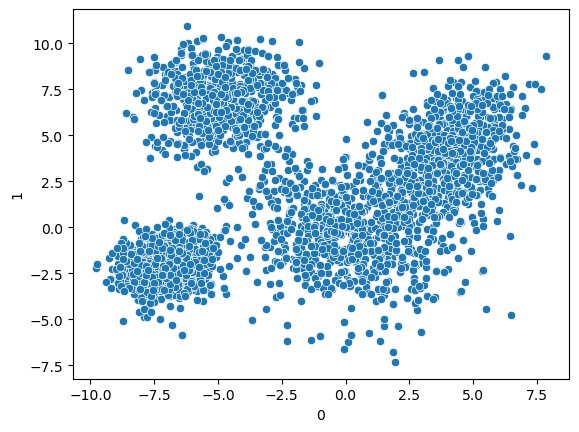

In [4]:

sns.scatterplot(
    data=cluster_df,
    x=0,
    y=1,
)

> **Question**: Even without K-Means clustering, how many clusters would you suggest ?

#### Normalisation
>
> Before applying a clustering algorithm, it's crucial to normalize the data to eliminate any outliers or anomalies.


In [17]:
cluster_df.iloc[:,0]

0       5.209759
1      -0.550619
2       1.990295
3      -6.508080
4      -2.375127
          ...   
2795   -2.142468
2796    2.781241
2797   -6.586410
2798   -7.717184
2799   -0.914334
Name: 0, Length: 2800, dtype: float64

In [12]:

from sklearn import preprocessing

df_norm = preprocessing.normalize(cluster_df[0])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.


#### Determine the number of clusters (K=?)

**Elbow-method**
The optimal value of K in the K-Means algorithm can be found using the Elbow method. This involves finding the inertia value of every K number of clusters from 1-10 and visualizing it.

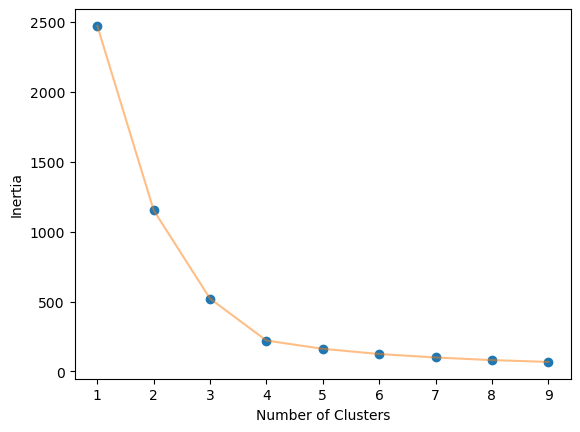

In [7]:
def elbow_plot(data,clusters):
    inertia = []
    for n in range(1, clusters):
        algorithm = KMeans(
            n_clusters=n,
            init="k-means++",
            random_state=125,
        )
        algorithm.fit(data)
        inertia.append(algorithm.inertia_)
    # Plot
    plt.plot(np.arange(1 , clusters) , inertia , 'o')
    plt.plot(np.arange(1 , clusters) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
    plt.show();

elbow_plot(df_norm,10)

We obtained an optimal value of 4. Perfect, thats what we also suggested!

####   Initialize cluster centroids, Assign data points to clusters,  Update cluster centroids, Iteratively Update


In [8]:
n_clusters = 4
epochs = 100


algorithm = KMeans(n_clusters=n_clusters,init="k-means++",max_iter=epochs,random_state=120 )
algorithm.fit(df_norm)
labels = algorithm.labels_

In [9]:
for k in algorithm.cluster_centers_:
    print(k)#algorithm.cluster_centers_

[0.69979852 0.64704985]
[-0.92346486 -0.3007062 ]
[-0.56941589  0.79211339]
[ 0.48439276 -0.74346135]


In [10]:
df_norm

array([[ 0.77910363,  0.62689516],
       [-0.30301973,  0.95298428],
       [ 0.82709385, -0.56206384],
       ...,
       [-0.82430649,  0.56614381],
       [-0.98577766, -0.16805477],
       [-0.6176137 , -0.78648161]])

In [9]:
# The number of iterations required to converge
algorithm.n_iter_

4

In [10]:
algorithm.labels_

array([0, 2, 3, ..., 2, 1, 1], dtype=int32)

#### Assign data points to clusters, plot final Result

Text(0.5, 1.0, 'Scikit-Learn K-means Results')

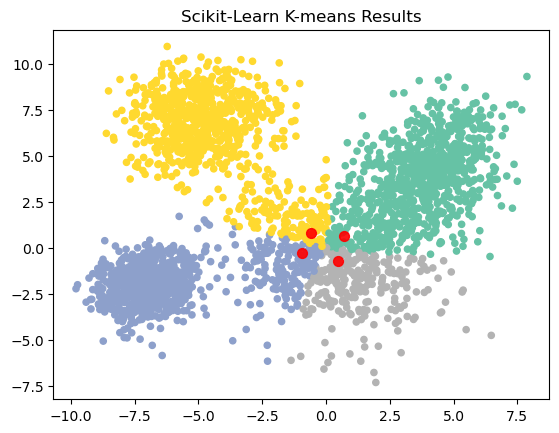

In [11]:
y_kmeans = algorithm.predict(cluster_df)


plt.scatter(cluster_df.iloc[:, 0], cluster_df.iloc[:, 1], c=y_kmeans, s=20, cmap="Set2")

centers = algorithm.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.9);
plt.title("Scikit-Learn K-means Results")

> **Exercise**
>
> Take a look at another data set. 
Visualise the data as a scatterplot. How many cluster centres can be expected? Why does KMeans clustering not work well here? What are the limitations of k-means?
>
>**Addition:** Research an alternative to k-means that could work here and implement it with Plot. 

In [12]:

cluster_df = pd.read_csv("data/cluster_sample_data_moons.csv", header=None, sep=" ")
cluster_df.head(3)

,0,1
0,0.890330,0.449208
1,0.927276,0.079686
2,0.176013,0.902117


#### solution

<Axes: xlabel='0', ylabel='1'>

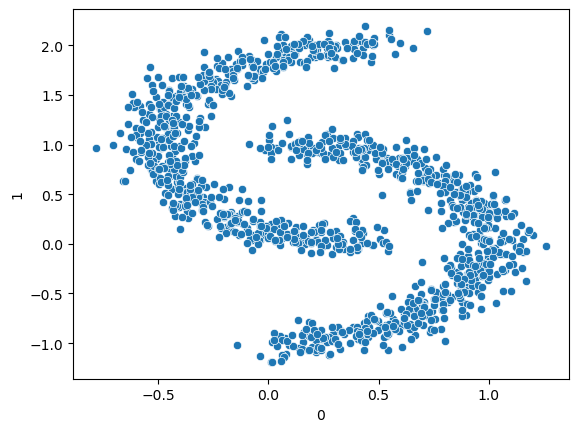

In [13]:

sns.scatterplot(
    data=cluster_df,
    x=0,
    y=1,
)

In [14]:
### normalize


from sklearn import preprocessing

df_norm = preprocessing.normalize(cluster_df)

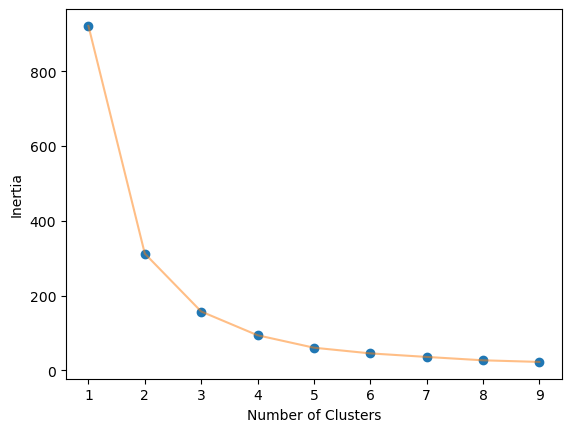

In [15]:
## elbow plot

elbow_plot(df_norm,10)

In [16]:
n_clusters = 2
epochs = 100


algorithm = KMeans(n_clusters=n_clusters,n_init='auto')#, init="k-means++",max_iter=epochs,random_state=120) # init="k-means++"
algorithm.fit(df_norm)
labels = algorithm.labels_

algorithm.n_iter_

5

Text(0.5, 1.0, 'Scikit-Learn K-means Results')

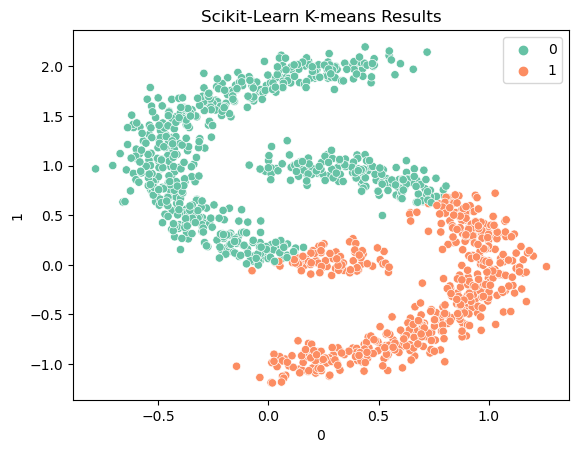

In [17]:
sns.scatterplot(data = cluster_df, x = 0, y = 1, hue = labels, palette="Set2");

plt.title("Scikit-Learn K-means Results")

* KMeans clustering may not work well in this case because the data points in the two clusters are unevenly distributed. KMeans is based on the assumption that the clusters are spherical and of similar size. If this assumption is not met, clustering can produce poor results.

* k-means is limited to linear cluster boundaries


A possible alternative that could work better is the so-called ‘DBSCAN’ (Density-Based Spatial Clustering of Applications with Noise). DBSCAN is based on the density of data points and can identify clusters even if they are not spherical or of similar size.


### Supervised learning
### 6.1. Support Vector Machines (SVM)

<div>
<img src="6_Clustering_figures/SVM_margin.png" width="400"/>
</div>

(figure by [Wikipedia 2018](https://en.wikipedia.org/wiki/Support_vector_machine#/media/File:SVM_margin.png) )


SVM classifies data by finding the best way to separate different groups of data in a multidimensional space. It finds the maximum margin between the closest data points of opposite groups, creating the optimal hyperplane. The number of features in the input data determines if the hyperplane is a line in a 2D space or a plane in an N-dimensional space. The SVM algorithm is used in machine learning because it can handle both linear and nonlinear classification tasks. However, when the data is not linearly separable, kernel functions are used to transform the data to enable linear separation. This is called the 'kernel trick'. The type of kernel used depends on the data and the task.

**Support Vectors**

Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

**Hyperplane**

A hyperplane is a decision plane which separates between a set of objects having different class memberships.

**Margin**

A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

**Let's get down to business**: Now you will learn about its implementation in Python using scikit-learn.

Data Cleaning and Processing

The following library has been utilized for data processing:

* pandas: It is an open-source Python module, having a wide scope of use in the field of computing, data analysis, statistics, etc. The following techniques have been implemented for Data Processing:
* Data Type conversions
* Label Encoding
* Feature Scaling

**Feature Scaling**

Feature Scaling refers to the technique of converting the numeric data into a standard range to improvise the performance of algorithms. This is obtained by normalizing or standardizing the data values. One of the most common feature-scaling techniques is min-max scaling which will be implemented here.

Min-max scaling is a feature scaling technique that involves the subtraction of the minimum value in the attribute with each observation and then dividing this by the range of the attribute.

Here, attributes: ‘bright_t31’, ‘brightness’, and ‘frp’ undergo min-max scaling. The technique will result in the transformation of all these attributes into normalized numerical form in the range of 0 to 1.

In [18]:
def min_max(variable, xmin = None, xmax = None):
    if (xmin != None) & (xmax == None):  ## no we are able to set xmin manually
        xmax = variable.max()
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
        return xmin, xmax, min_max_done
    elif (xmin != None) & (xmax != None):  ## no we are able to set xmin and xmax manually
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
        return xmin, xmax, min_max_done
    else:
        xmin, xmax = variable.min(), variable.max()
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
    return xmin, xmax, min_max_done

#### Working Data Set example: Crop Recommendations

For building the SVM model we will use the Crop Recommendation Dataset. our aim is to **Maximize agricultural yield by recommending appropriate crops**. You can find this example on [kaggle here](https://www.kaggle.com/code/atharvaingle/what-crop-to-grow#Support-Vector-Machine-(SVM)) and you can download the data from [kaggle here](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset).

**About the data set:**

This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

**Data fields**

* `N` - ratio of Nitrogen content in soil
* `P` - ratio of Phosphorous content in soil
* `K` - ratio of Potassium content in soil
* `temperature` - temperature in degree Celsius
* `humidity` - relative humidity in %
* `ph` - ph value of the soil
* `rainfall` - rainfall in mm

In [19]:
## read the data into pandas df

PATH = 'Crop_recommendation.csv'
df = pd.read_csv(PATH)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [20]:
df.shape

(2200, 8)

> **Exercise**:
> 
> Whats the datatype of each column?
> 
> Find all unique crops in the `label` column!
>
> How many entries are there per label?


In [21]:
### your code here ###

##### solution

In [22]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [23]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [24]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

#### Data exploration

We will plot a correlation matrix (pearson) to quickly gain an overview of structures within our data: 

<Axes: >

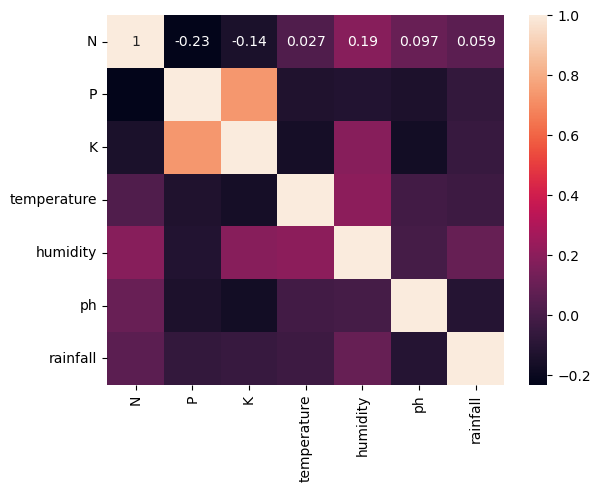

In [25]:
sns.heatmap(df.iloc[:,0:7].corr(),annot=True)

#### Ressources for this script: 

KMeans: 

* [Artley 2022](https://towardsdatascience.com/unsupervised-learning-k-means-clustering-27416b95af27)
* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

SVM:
* [Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/svm.html)